<a href="https://colab.research.google.com/github/seanzhu815/business-forecasting/blob/main/Assignment_1_Sample_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Solution

### We first import the necessary packages

In [ ]:
import pandas            as pd   
import numpy             as np   
import scipy             as scp  
import matplotlib.pyplot as plt 
import os as os
from datetime import date as dd 
from scipy import stats    
from scipy import optimize
import statsmodels.api as sm
# %matplotlib inline

### We now get the data


In [ ]:
os.getcwd()
df=pd.read_excel('Assignment_1_MF402_2022.xlsx')
os.getcwd()

'/Users/zsy/Desktop/ucsd fall quarter/402 investment analysis/assign1'

## Part One

In [ ]:
df.head()

,DATE,US stock returns,US stock index (total return),dividend yield (per year),10-year bond returns,10-year bond index,3-month T-bill return,3-month T-bill index,Monthly inflation rate,Inflation index,BTC value,BTC index,BTC returns,Gold value,Gold index,Gold returns
0,19500131,0.017764,100.000000,0.0681,-0.006128,100.000000,0.000913,100.000000,-0.001843,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,19500228,0.009971,100.997067,0.0674,0.002117,100.211700,0.000879,100.087929,0.001843,100.425351,NaN,NaN,NaN,NaN,NaN,NaN
2,19500331,0.004065,101.407625,0.0674,0.000821,100.293983,0.000976,100.185588,0.000551,100.552956,NaN,NaN,NaN,NaN,NaN,NaN
3,19500429,0.045113,105.982405,0.0661,0.002998,100.594708,0.000834,100.269185,0.000184,100.595491,NaN,NaN,NaN,NaN,NaN,NaN
4,19500531,0.039292,110.146628,0.0645,0.003311,100.927750,0.001082,100.377685,0.002198,101.105912,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
date = df.iloc[:,0]
returns = df.iloc[:,1]         # Nominal returns
inflation = df.iloc[:,8]       # Inflation
real_ret = returns - inflation # Real returns
cons=df.iloc[:17]
# Fill in rfrate and rf10 from the dataframe
rfrate = df.iloc[:,6]
rf10 =  df.iloc[:,4]     # Risk free rate
df

,DATE,US stock returns,US stock index (total return),dividend yield (per year),10-year bond returns,10-year bond index,3-month T-bill return,3-month T-bill index,Monthly inflation rate,Inflation index,BTC value,BTC index,BTC returns,Gold value,Gold index,Gold returns
0,19500131,0.017764,100.000000,0.0681,-0.006128,100.000000,0.000913,100.000000,-0.001843,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,19500228,0.009971,100.997067,0.0674,0.002117,100.211700,0.000879,100.087929,0.001843,100.425351,NaN,NaN,NaN,NaN,NaN,NaN
2,19500331,0.004065,101.407625,0.0674,0.000821,100.293983,0.000976,100.185588,0.000551,100.552956,NaN,NaN,NaN,NaN,NaN,NaN
3,19500429,0.045113,105.982405,0.0661,0.002998,100.594708,0.000834,100.269185,0.000184,100.595491,NaN,NaN,NaN,NaN,NaN,NaN
4,19500531,0.039292,110.146628,0.0645,0.003311,100.927750,0.001082,100.377685,0.002198,101.105912,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,20210831,0.028990,26525.982405,0.0132,-0.004837,4858.115933,0.000030,2288.817882,0.001446,1161.599319,47166.687500,13941.400489,0.133101,NaN,654.861111,-0.011530
860,20210930,-0.047569,25264.164223,0.0133,-0.015425,4783.179495,0.000080,2289.000987,0.001781,1166.371757,43790.894531,12943.592836,-0.071572,1755.3,641.557018,-0.020316
861,20211029,0.069144,27011.026393,0.0134,-0.004896,4759.761048,-0.000034,2288.923161,0.003747,1176.478094,61318.957031,18124.489610,0.400267,1783.0,651.681287,0.015781
862,20211130,-0.008334,26785.923754,0.0129,0.012455,4819.043872,0.000073,2289.090253,0.003026,1184.704381,57005.425781,16849.507841,-0.070346,1773.6,648.245614,-0.005272


### Question 1.1

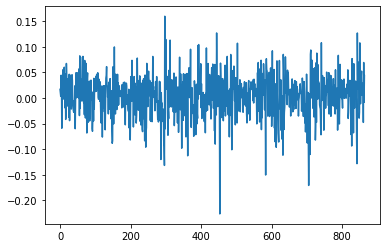

In [ ]:
erp = returns - rfrate         # Excess Return
plt.plot(erp)

We now need to run a regression of excess return on a constant. There are multiple ways of doing this. We can define a user created function or use statsmodels package. Here we will use statsmodels package.

In [ ]:
dim = erp.shape[0]
cons=np.ones((1,864),dtype=int).reshape(-1,1)
model = sm.OLS(12*erp,cons).fit()
yhat = model.predict()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                nan
Time:                        19:47:05   Log-Likelihood:                -629.07
No. Observations:                 864   AIC:                             1260.
Df Residuals:                     863   BIC:                             1265.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0456      0.017      2.670      0.008       0.012       0.079
==============================================================================
Omnibus:                       64.481   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.061
Skew:                          -0.456   Prob(JB):                     1.73e-30
Kurtosis:                       4.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to look at the standard errors of the constant. Do they look small or large to you?

### Question 1.2

We are now interested in the moving average of the equity risk premium.

In [ ]:
ma_erp=erp.rolling(window=120).mean()

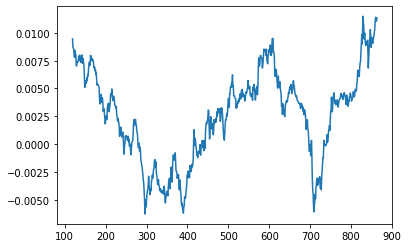

In [ ]:
plt.plot(ma_erp)

From the graph above it is clear that the historical estimate of the equity risk premium is stable/not stable.

### Question 1.3

# We get the long run US GDP growth from the Survey of Professional Forecasters:

https://www.philadelphiafed.org/surveys-and-data/real-time-data-research/spf-q3-2021

2025 GDP Growth rate is xxx

In [ ]:
us_gdp_growth = 0.021        # Fill from above

From FRED we get the 10 Year TIPS https://fred.stlouisfed.org/series/DFII10#0


For 2021 year end we have: xxx


In [ ]:
tips_yield =  -0.0104

In [ ]:
last_dpratio = df.iloc[dim-1,3]
last_dpratio

0.0129

According to the Grodon Growth model the equity risk premium is given by:

In [ ]:
gordon = last_dpratio*(1+us_gdp_growth) + us_gdp_growth - tips_yield
print("According to the Gordon Growth Model the ERP is %.2f percent" % (gordon*100))

According to the Gordon Growth Model the ERP is 4.46 percent


### Question 1.4

The novel approach in Slide 9 of the case study gives the following formula: $$ ERP = E/P - RealBondYield $$


In [ ]:
ep = 4.6/100
erp_nov= ep - 0.0156                                        # Fill in the relevant variables
print(f'according to the novel method, ERP is equal to {erp_nov*100}%')

according to the novel method, ERP is equal to 3.04%


## Part Two

### Question 2.1

a. We need to calculate the annualized sharpe ratio. We first get the mean return over the full sample and multiply by 12 to annualize, then we get the standard deviation over the full sample and multiply by the square root of 12.

In [ ]:
erp = returns- rf10
vol_ret = np.std(returns)              
annualized_vol = 12**0.5*vol_ret               # Compute the annnualized volatility of returns

mean_erp = np.mean(erp)
annualized_erp = 12*mean_erp

shratio = annualized_erp/annualized_vol                   # Compute the Sharpe ratio
print("The annualized sharpe ratio is %.2f" % shratio)

The annualized sharpe ratio is 0.23


b. We now need to calculate the 3% VaR 

In [ ]:
alpha_var = 0.03
returns_sorted = np.sort(returns)

VaR = np.quantile(returns_sorted, alpha_var) # quantile interpolates (linear default)
print("The VaR is %.2f percent" % (VaR*100))

The VaR is -7.91 percent


c. Calculating Expected Shortfall

In [ ]:
alpha_es = 0.03
sum=0
numbers=0
for i in returns_sorted:
    if i <VaR:
        sum+=i
        numbers+=1
mean=sum/numbers
ES = mean
print("The Expected Shortfall is %.2f percent" % (ES*100))

The Expected Shortfall is -10.36 percent


d. Calculating Skew

In [ ]:
sk = scp.stats.skew(returns)
print("The skewness is %.2f" % sk)

The skewness is -0.43


e. Calculating Kurtosis

In [ ]:
kurt = scp.stats.kurtosis(returns)
print("The kurtosis is %.2f" % kurt)

The kurtosis is 1.70


In [ ]:
df['DATE']
returns

0      0.017764
1      0.009971
2      0.004065
3      0.045113
4      0.039292
         ...   
859    0.028990
860   -0.047569
861    0.069144
862   -0.008334
863    0.043613
Name: US stock returns, Length: 864, dtype: float64

f. We now need to calculate Maximum Drawdown. We use the python code used in class to have a user written function.

In [ ]:
def maxdrawdown(x): 
    """
    NumPy analog to corresponding MATLAB Financial Toolbox Function
    OUTPUT: start, end, and max drawdown in terms of max percentage drop from a peak
    """
    i = np.argmax(np.maximum.accumulate(x) - x) # end of period
    j = np.argmax(x[:i]) # start of the period
    percent_change = 100*( x[i] - x[j] ) / x[j]
    return j,i,percent_change

def datenum(date):
    """
    Converts yyyymmdd dates to ordinal code
    """
    dn = np.zeros(date.shape)
    for i in range(len(date)):
        dt = str(date[i])
        dn[i] = dd.toordinal(dd(int(dt[0:4]),int(dt[4:6]),int(dt[6:8])))
    return dn

In [ ]:
cumulativeret = np.cumprod(1+returns)

cumulativeret


0        1.017764
1        1.027912
2        1.032090
3        1.078651
4        1.121033
          ...    
859    269.971900
860    257.129568
861    274.908503
862    272.617489
863    284.507121
Name: US stock returns, Length: 864, dtype: float64

In [ ]:
MaxDDStartIndex, MaxDDEndIndex, MaxDD = maxdrawdown(cumulativeret)
begdate = date[MaxDDStartIndex]
enddate = date[MaxDDEndIndex]

693

In [ ]:
print(f'The Maximum Drawdown is {MaxDD:.4}%')

The Maximum Drawdown is -52.56%


In [ ]:
print(f'Max VC DrawDown from date {begdate} to date {enddate}')

Max VC DrawDown from date 20071031 to date 20090227


g. Checking normality

(array([  1.,   2.,   5.,  32., 107., 295., 311.,  93.,  15.,   3.]),
 array([-0.21763043, -0.17956269, -0.14149496, -0.10342723, -0.0653595 ,
        -0.02729176,  0.01077597,  0.0488437 ,  0.08691143,  0.12497917,
         0.1630469 ]),
 <a list of 10 Patch objects>)

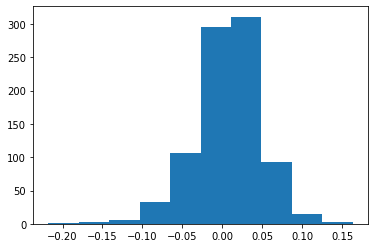

In [ ]:
plt.hist(returns)

Looking at the histogram, skewness and kurtosis, we conclude xxx.

### Question 2.2

We first setup the Sharpe ratio function for the optimization problem. 

In [ ]:
def Shratio(w,mu,Sigma,Rf): 
    portfolio_return = np.sum(mu * w) - Rf    # portfolio excess return
    portfolio_vol    = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))  # portfolio volatility
    return portfolio_return / portfolio_vol

We now need to set the risk free rate and select the number of assets in our portfolio.

In [ ]:
Rf = rfrate[len(rfrate)-1]  # risk free rate
n = 2                      # number of assets
tbonds_ret = df.iloc[:,4]   # tbonds
tbills_ret =df.iloc[:,6]    # tbills
Rf

8.1e-05

Combine stock, and bond returns in to a matrix, calculate the mean return of all assets, and the covariance.

In [ ]:
ret = np.concatenate((np.expand_dims(returns,1), np.expand_dims(tbonds_ret,1)),axis = 1)
mu = np.mean(ret, axis = 0)
Sigma = np.cov(ret, rowvar = False)
Sigma

array([[1.72729425e-03, 5.52795606e-05],
       [5.52795606e-05, 4.27534215e-04]])

Set the initial weights to be equal

In [ ]:
w0 = np.ones((n,1))/n 
w0

array([[0.5],
       [0.5]])

Set the constraint condition and solve for the tangency portfolio.

In [ ]:
cons = ({'type' : 'eq', 'fun': lambda x: x[0] + x[1] - 1}) # portfolio weights sum to 1

# solve for tangency portfolio
sol = scp.optimize.minimize(lambda w: -Shratio(w, mu, Sigma, Rf), x0 = w0, constraints = cons) 
w_uncon = sol.x
val = -sol.fun

print(f'optimal weights are {w_uncon} with Sharpe ratio {val:.2}')


optimal weights are [0.27653573 0.72346427] with Sharpe ratio 0.28


Calculate the mean and variance of the tangency portfolio, and the weight on the portfolio.

In [ ]:
#### add risk-free asset
gam = 5                                         # gamma: risk aversion coefficient
mu_uncon  = w_uncon.T.dot(mu)                   # mean of tangency portfolio
var_uncon = np.dot(w_uncon.T, np.dot(Sigma,w_uncon))                                    # variance of tangency portfolio
wT_con    =(mu_uncon-Rf)/(gam*var_uncon)                                    # weight to be put in the tangency when maximizing mean variance utility
rcon      = wT_con*mu_uncon + (1-wT_con)*Rf

In [ ]:
c=np.dot(Sigma,w_uncon)
w_uncon


array([0.27653573, 0.72346427])

In [ ]:
print(f'The mean of the tnagency portfolio is :{mu_uncon:.2}')
print(f'The variance of the tangency portfolio is : {var_uncon:.2}')
print(f'The weight on the risky portfolio is : {wT_con:.2}')
print(f'The return of the tangency portfolio is : {rcon:.2}')


The mean of the tnagency portfolio is :0.0055
The variance of the tangency portfolio is : 0.00038
The weight on the risky portfolio is : 2.8
The return of the tangency portfolio is : 0.015


### Question 2.3

In [ ]:
delta = tbonds_ret - returns
sumd=0
for i in delta:
    if i>0:
        sumd+=1
    
under = sumd / dim

In [ ]:
print(f'a. Stocks underperform bonds approx. {100*under:.4}% of the time.')

a. Stocks underperform bonds approx. 43.98% of the time.


In [ ]:
def CumReturnsAndDeltas(df, num_months, dim):
    
    ret =[]
    delta = []
    stk=[]
    bond=[]
    for i in range(num_months-1, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months+1,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months+1,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months+1,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months+1,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months+1,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months+1,9] ) - 1 ])) # Inflation
        delta.append(ret[i-num_months+1][1]- ret[i-num_months+1][0])

    ret = np.array(ret)
    delta = np.array(delta)
    stk.append(ret[i-num_months+1][0])
    bond=stk.append(ret[i-num_months+1][1])
    return ret, delta 



In [ ]:
ret_cumulative_1yr, delta_1yr = CumReturnsAndDeltas(df, 12, dim)
sumd1=0
for i in delta_1yr:
    if i>0:
        sumd1+=1
delt_1yr=sumd1 / delta_1yr.shape[0]

ret_cumulative_5yr, delta_5yr = CumReturnsAndDeltas(df, 60, dim)
sumd2=0
for i in delta_5yr:
    if i>0:
        sumd2+=1


ret_cumulative_10yr, delta_10yr = CumReturnsAndDeltas(df, 120, dim)
sumd3=0
for i in delta_10yr:
    if i>0:
        sumd3+=1
delt_10yr=sumd3 / delta_10yr.shape[0]

In [ ]:
print( f'b.i At the 1 year horizon stocks underperformed bonds {delt_1yr*100:.4}% of the time.')

b.i At the 1 year horizon stocks underperformed bonds 40.09% of the time.


In [ ]:
print(f'b.ii At the 5 year horizon stocks underperformed bonds {delt_5yr*100:.4}% of the time.')

b.ii At the 5 year horizon stocks underperformed bonds 40.87% of the time.


In [ ]:
print(f'b.iii At the 10 year horizon stocks underperformed bonds {delt_10yr*100:.4}% of the time.')

b.iii At the 10 year horizon stocks underperformed bonds 43.09% of the time.


In [ ]:
def CumStocksAndBonds(df, num_months, dim):
    
    ret =[]
    stk=[]
    bond=[]
    tbl=[]
    btc=[]
    gld=[]
    inf=[]
    for i in range(num_months-1, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months+1,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months+1,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months+1,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months+1,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months+1,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months+1,9] ) - 1 ])) # Inflation
        stk.append(ret[i-num_months+1][0])
        bond.append(ret[i-num_months+1][1])
        tbl.append(ret[i-num_months+1][2])
        btc.append(ret[i-num_months+1][3])
        gld.append(ret[i-num_months+1][4])
        inf.append(ret[i-num_months+1][5])
    ret = np.array(ret)
    stk = np.array(stk)
    bond= np.array(bond)
    tbl = np.array(tbl)
    btc = np.array(btc)
    gld = np.array(gld)
    inf = np.array(inf)
    return  stk,bond


In [ ]:
stk_1yr, bond_1yr = CumStocksAndBonds(df, 12, dim)

In [ ]:
var_stk_1yr=np.var(stk_1yr)
var_bond_1yr=np.var(bond_1yr)
print( f' At the 1 year horizon, the variance of stocks returns is {var_stk_1yr*100:.4}% ')
print( f' At the 1 year horizon, the variance of bonds returns is {var_bond_1yr*100:.4}% ')

 At the 1 year horizon, the variance of stocks returns is 2.26% 
 At the 1 year horizon, the variance of bonds returns is 0.6088% 


In [ ]:
stk_5yr, bond_5yr = CumStocksAndBonds(df, 60, dim)
var_stk_5yr=np.var(stk_5yr)
var_bond_5yr=np.var(bond_5yr)
print( f' At the 5 year horizon, the variance of stocks returns is {var_stk_5yr*100:.4}% ')
print( f' At the 5 year horizon, the variance of bonds returns is {var_bond_5yr*100:.4}% ')

 At the 5 year horizon, the variance of stocks returns is 21.6% 
 At the 5 year horizon, the variance of bonds returns is 7.57% 


In [ ]:
stk_10yr, bond_10yr = CumStocksAndBonds(df, 120, dim)
var_stk_10yr=np.var(stk_10yr)
var_bond_10yr=np.var(bond_10yr)
print( f' At the 10 year horizon, the variance of stocks returns is {var_stk_10yr*100:.4}% ')
print( f' At the 10 year horizon, the variance of bonds returns is {var_bond_10yr*100:.4}% ')

 At the 10 year horizon, the variance of stocks returns is 76.57% 
 At the 10 year horizon, the variance of bonds returns is 37.25% 


## PART 3

US stocks


In [ ]:
def ReturnsAndCov(df, num_months, dim):
    
    ret =[]
    stk=[]
    tbl=[]
    btc=[]
    gld=[]
    inf=[]
    for i in range(num_months-1, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months+1,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months+1,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months+1,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months+1,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months+1,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months+1,9] ) - 1 ])) # Inflation
        stk.append(ret[i-num_months+1][0])
        tbl.append(ret[i-num_months+1][2])
        btc.append(ret[i-num_months+1][3])
        gld.append(ret[i-num_months+1][4])
        inf.append(ret[i-num_months+1][5])
    ret = np.array(ret)
    stk = np.array(stk)
    tbl = np.array(tbl)
    btc = np.array(btc)
    gld = np.array(gld)
    inf = np.array(inf)
    return  stk,tbl,btc,gld,inf


In [ ]:
stk_3m,tbl_3m,btc_3m,gld_3m,inf_3m=ReturnsAndCov(df, 3, dim)

In [ ]:
btc_3m = btc_3m[~np.isnan(btc_3m)]
gld_3m=gld_3m[~np.isnan(gld_3m)]

In [ ]:
a3=np.corrcoef(stk_3m,inf_3m)[0][1]
b3=np.corrcoef(tbl_3m,inf_3m)[0][1]
c3=np.corrcoef(btc_3m,inf_3m[777:])[0][1]
d3=np.corrcoef(gld_3m,inf_3m[608:])[0][1]
print(f'The covirance of three months stocks and inflation is {a3:.5}')
print(f'The covirance of three months T-bills and inflation is {b3:.5}')
print(f'The covirance of three months Bitcoin and inflation is {c3:.5}')
print(f'The covirance of three months gold and inflation is {d3:.5}')

The covirance of three months stocks and inflation is -0.069678
The covirance of three months T-bills and inflation is 0.48414
The covirance of three months Bitcoin and inflation is 0.075066
The covirance of three months gold and inflation is 0.033833


In [ ]:
stk_12m,tbl_12m,btc_12m,gld_12m,inf_12m=ReturnsAndCov(df, 12, dim)

In [ ]:
btc_12m = btc_12m[~np.isnan(btc_12m)]
gld_12m=gld_12m[~np.isnan(gld_12m)]

In [ ]:
a12=np.corrcoef(stk_12m,inf_12m)[0][1]
b12=np.corrcoef(tbl_12m,inf_12m)[0][1]
c12=np.corrcoef(btc_12m,inf_12m[777:])[0][1]
d12=np.corrcoef(gld_12m,inf_12m[608:])[0][1]
print(f'The covirance of 12 months stocks and inflation is {a12:.5}')
print(f'The covirance of 12 months T-bills and inflation is {b12:.5}')
print(f'The covirance of 12 months Bitcoin and inflation is {c12:.5}')
print(f'The covirance of 12 months gold and inflation is {d12:.5}')

The covirance of 12 months stocks and inflation is -0.16757
The covirance of 12 months T-bills and inflation is 0.63839
The covirance of 12 months Bitcoin and inflation is 0.17816
The covirance of 12 months gold and inflation is 0.2095


In [ ]:
stk_24m,tbl_24m,btc_24m,gld_24m,inf_24m=ReturnsAndCov(df, 24, dim)

In [ ]:
btc_24m = btc_24m[~np.isnan(btc_24m)]
gld_24m=gld_24m[~np.isnan(gld_24m)]

In [ ]:
a24=np.corrcoef(stk_24m,inf_24m)[0][1]
b24=np.corrcoef(tbl_24m,inf_24m)[0][1]
c24=np.corrcoef(btc_24m,inf_24m[777:])[0][1]
d24=np.corrcoef(gld_24m,inf_24m[608:])[0][1]
print(f'The correlation of 3 months stocks and inflation is {a3:.5}')
print(f'The correlation of 3 months T-bills and inflation is {b3:.5}')
print(f'The correlation of 3 months Bitcoin and inflation is {c3:.5}')
print(f'The correlation of 3 months gold and inflation is {d3:.5}')
print(f'The correlation of 12 months stocks and inflation is {a12:.5}')
print(f'The correlation of 12 months T-bills and inflation is {b12:.5}')
print(f'The correlation of 12 months Bitcoin and inflation is {c12:.5}')
print(f'The correlation of 12 months gold and inflation is {d12:.5}')
print(f'The correlation of 24 months stocks and inflation is {a24:.5}')
print(f'The correlation of 24 months T-bills and inflation is {b24:.5}')
print(f'The correlation of 24 months Bitcoin and inflation is {c24:.5}')
print(f'The correlation of 24 months gold and inflation is {d24:.5}')

The correlation of 3 months stocks and inflation is -0.069678
The correlation of 3 months T-bills and inflation is 0.48414
The correlation of 3 months Bitcoin and inflation is 0.075066
The correlation of 3 months gold and inflation is 0.033833
The correlation of 12 months stocks and inflation is -0.16757
The correlation of 12 months T-bills and inflation is 0.63839
The correlation of 12 months Bitcoin and inflation is 0.17816
The correlation of 12 months gold and inflation is 0.2095
The correlation of 24 months stocks and inflation is -0.23049
The correlation of 24 months T-bills and inflation is 0.70383
The correlation of 24 months Bitcoin and inflation is 0.15062
The correlation of 24 months gold and inflation is 0.40425
